# Recommender systems

## Movielens 100k dataset

### Caricamento librerie

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

### Caricamento dataset valutazioni utenti

In [2]:
df_ratings = pd.read_csv("data/ratings.csv")

In [3]:
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


### Caricamento dataset film

In [4]:
df_movies = pd.read_csv("data/movies.csv")

In [5]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


### Unione dataset valutazioni e film

In [6]:
df = pd.merge(df_ratings, df_movies, on="movieId")

In [7]:
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


### Calcolo punteggio medio e numero recensioni per film

In [8]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())

In [9]:
ratings['# of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())

In [10]:
ratings.head()

,rating,# of ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


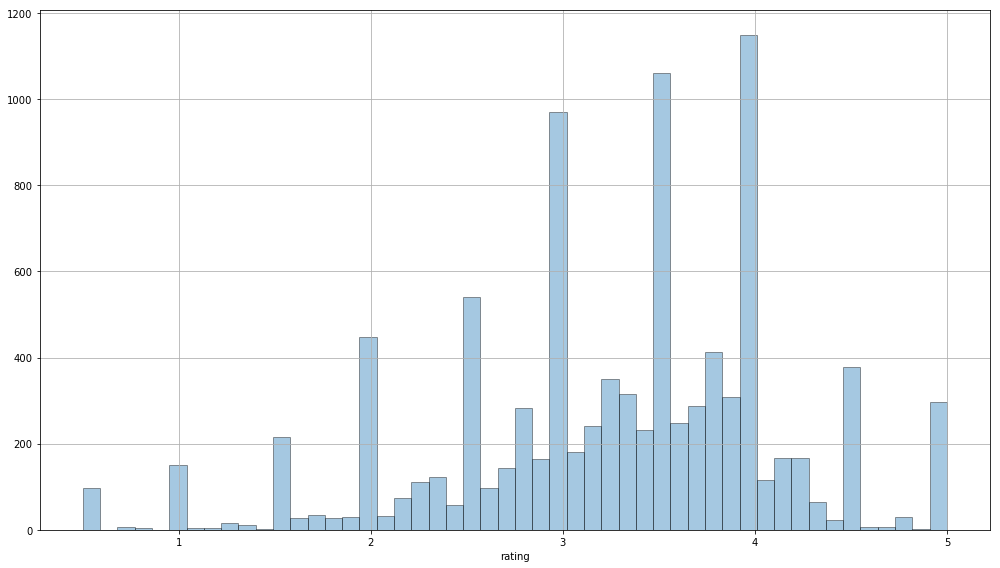

In [11]:
plt.figure(figsize=(14, 8))
sns.distplot(ratings["rating"], bins=50, kde=False, hist_kws={"edgecolor": "black"})
plt.grid()
plt.tight_layout()
plt.show()

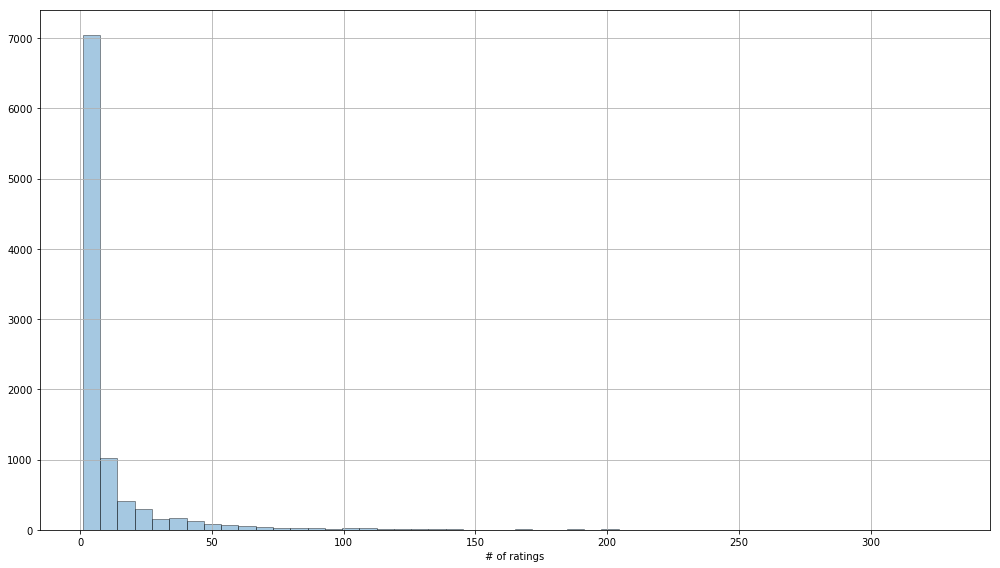

In [12]:
plt.figure(figsize=(14, 8))
sns.distplot(ratings["# of ratings"], bins=50, kde=False, hist_kws={"edgecolor": "black"})
plt.grid()
plt.tight_layout()
plt.show()

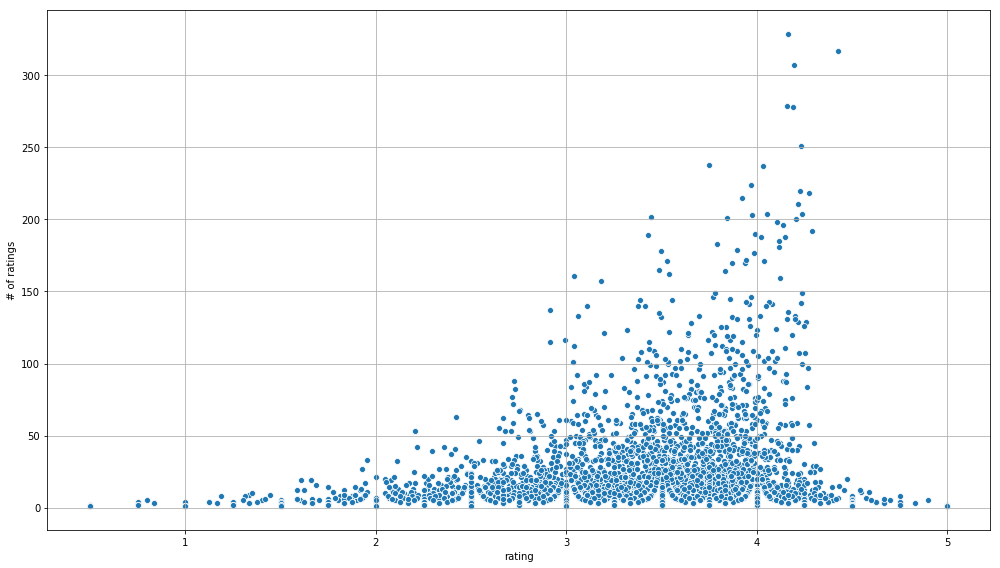

In [13]:
plt.figure(figsize=(14, 8))
sns.scatterplot(x="rating", y="# of ratings", data=ratings)
plt.grid()
plt.tight_layout()
plt.show()

### Film con più recensioni

In [14]:
ratings.sort_values('# of ratings',ascending=False).head(10)

,rating,# of ratings
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


### Creazione matrice utenti x film

In [15]:
matrix = df.pivot_table(index="userId", columns="title", values="rating")

In [16]:
matrix.head(50)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


### Si estrae la colonna contenente le valutazioni del film "The Matrix"

In [17]:
the_matrix = matrix["Matrix, The (1999)"]

### Si calcola la correlazione delle valutazioni di "The Matrix" con quelle degli altri film presenti nella matrice utenti x film

In [18]:
similar_the_matrix = matrix.corrwith(the_matrix)

/opt/conda/lib/python3.7/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/opt/conda/lib/python3.7/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [19]:
similar_the_matrix


title
'71 (2014)                                                                                       NaN
'Hellboy': The Seeds of Creation (2004)                                                          NaN
'Round Midnight (1986)                                                                           NaN
'Salem's Lot (2004)                                                                              NaN
'Til There Was You (1997)                                                                        NaN
'Tis the Season for Love (2015)                                                                  NaN
'burbs, The (1989)                                                                         -0.160843
'night Mother (1986)                                                                             NaN
(500) Days of Summer (2009)                                                                 0.302316
*batteries not included (1987)                                                       

### Si visualizzano i film più correlati con il film "The Matrix"

In [19]:
df_matrix = pd.DataFrame(similar_the_matrix, columns=["Correlation"])
df_matrix.dropna(inplace=True)
df_matrix.sort_values("Correlation", ascending=False).head(10)

,Correlation
title,
Haywire (2011),1.0
Highway 61 (1991),1.0
World on a Wire (Welt am Draht) (1973),1.0
"War Zone, The (1999)",1.0
"Hitcher, The (1986)",1.0
Gross Anatomy (a.k.a. A Cut Above) (1989),1.0
Paper Towns (2015),1.0
Juwanna Mann (2002),1.0
Topsy-Turvy (1999),1.0


### Si aggiunge la colonna contenente il numero di valutazioni

In [20]:
df_matrix = df_matrix.join(ratings["# of ratings"])

### Si visualizzano i film più correlati con "The Matrix" con almeno 100 valutazioni

In [21]:
df_matrix[df_matrix["# of ratings"] >= 100].sort_values("Correlation", ascending=False).head(10)

,Correlation,# of ratings
title,,
"Matrix, The (1999)",1.000000,278
Die Hard (1988),0.544466,145
Inception (2010),0.514767,143
Braveheart (1995),0.496045,237
Aliens (1986),0.470865,126
"Lion King, The (1994)",0.444932,172
"Monsters, Inc. (2001)",0.441205,132
Batman Begins (2005),0.440338,116
Jurassic Park (1993),0.427936,238
